In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.figure(figsize = (22,16))

<Figure size 2200x1600 with 0 Axes>

<Figure size 2200x1600 with 0 Axes>

In [4]:
data_dir = "./data"
os.listdir(data_dir)

FileNotFoundError: [Errno 2] No such file or directory: './data'

In [21]:
filepath = "/Users/hakan/bank/mortgage-scraper/data/sbab_mortgage_pricing_11_04_23.csv"
df = pd.read_csv(filepath, index_col=0)

In [22]:
# standardise and strip superflous columns
superflous_cols = ["provider", "effektivrantesats", "loptidtext"]
relevant_cols = [c for c in df.columns if c not in superflous_cols]

df = df[relevant_cols]
df.columns = [c.lower().strip() for c in df.columns]

clean_columns_names = {
    "rantesats": "interest_rate",
    "rantebindningstid": "period",
    "loan_amount": "loan_volume",
}

df = df.rename(columns=clean_columns_names)
df.head()

,loptidtext,interest_rate,period,effektivrantesats,loan_volume,asset_value
0,2023-07-13,4.17,3,0.0,50000,50000
1,2024-04-15,4.92,12,0.0,50000,50000
2,2025-03-17,4.91,24,0.0,50000,50000
3,2026-03-17,4.73,36,0.0,50000,50000
4,2027-03-17,4.65,48,0.0,50000,50000


In [25]:
# adding LTV ratios and dropping rows with LTVs > 1
df["ltv"] = df.loan_volume / df.asset_value
df = df.loc[df["ltv"] <= 1]

In [34]:
# subset into different maturity periods
three_month_df = df.loc[df.period == 3].drop(["period", "asset_value"], axis=1)

# adding discount (ambigious, but inferred through the max rate)
three_month_df["discount"] = three_month_df["interest_rate"] - three_month_df["interest_rate"].max()

In [35]:
three_month_df.interest_rate.value_counts()

4.17    4960
3.77    4146
3.72    1851
3.82    1843
3.74    1740
3.80    1640
4.05    1067
3.99     383
4.11     369
3.94     346
3.88     340
3.87     172
3.92     172
3.97     171
3.85     171
4.02     156
4.07     137
3.90     117
4.12      98
3.95      76
4.04      40
4.00      23
4.03      22
4.09      20
4.06      18
4.14      10
4.10       4
3.93       4
3.98       4
Name: interest_rate, dtype: int64

/var/folders/68/3p5ykqwn2d593c1wxw5v6sq80000gn/T/ipykernel_34549/970022698.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(three_month_df.pivot("loan_volume", "ltv", "discount"))


<AxesSubplot: xlabel='ltv', ylabel='loan_volume'>

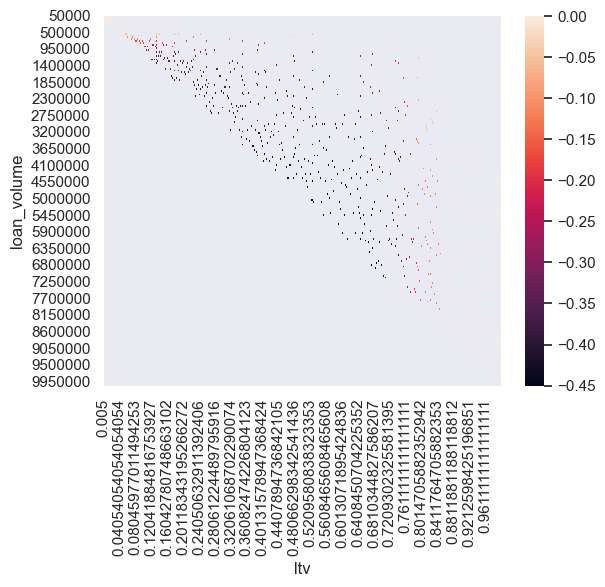

In [33]:
# Draw a heatmap with the numeric values in each cell
sns.heatmap(three_month_df.pivot("loan_volume", "ltv", "discount"))